### Creating a retention dataset for users

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uuid
import datetime
import random

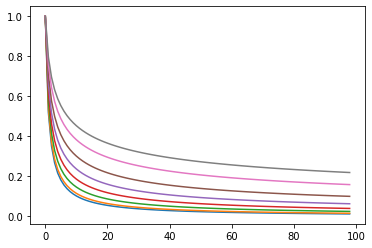

In [107]:
dfu = pd.DataFrame()
start_day = 1
end_day = 100

for i, cohort in enumerate([.95, .9, .8, .7, .6, .5, .4, .33]):  
    
    start_date = datetime.date(2020, i+1, 1)
    end_date = datetime.date(2020, i+2, 1)

    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days

    p = 1 / np.power(range(start_day,end_day), cohort)

    dfc = pd.DataFrame()
    users = []
    user_ids = []
    user_start_date = []
    for user in range(int((((1 - cohort) * 5000) + np.random.randint(50,200)))):
        
        random_number_of_days = random.randrange(days_between_dates)
        random_date = start_date + datetime.timedelta(days=random_number_of_days)
        user_start_date.append(random_date)
        
        user_active = np.random.binomial(1, p)
        users.append(user_active)
        user_ids.append(str(uuid.uuid4()))
    dfc = dfc.append(users)
  
    dfc['cohort'] = i
    dfc['user_id'] = user_ids
    dfc['start_date'] = user_start_date
    dfu = dfu.append(dfc, ignore_index=True)

    plt.plot(p);

In [108]:
dfu = dfu.melt(id_vars=['user_id', 'start_date', 'cohort'], value_vars=range(start_day-1,end_day-1), value_name='active', var_name='day_since_start')
dfu = dfu[dfu['active']==1]
dfu['start_date'] = pd.to_datetime(dfu['start_date'])
dfu['day'] = dfu['start_date'] + dfu['day_since_start'].apply(lambda x: pd.Timedelta(x, unit='d'))

In [109]:
dfu.to_csv('../data/fullretentiondata.csv', index=False)

In [110]:
dfu[['user_id', 'day', 'active']].to_csv('../data/RetentionDataset.csv', index=False)